# **Basic Statistics**

**Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset**

**Introduction:**

To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.

**Task 1: Descriptive Analytics for Numerical Columns**

● Objective:
To compute and analyze basic statistical measures for numerical columns in the dataset.

● Steps:

1) Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).

2) Identify numerical columns in the dataset.

3) Calculate the mean, median, mode, and standard deviation for these columns.

4) Provide a brief interpretation of these statistics.

**Task 2: Data Visualization**

● Objective:

To visualize the distribution and relationship of numerical and categorical variables in the dataset.

● Histograms:

1) Plot histograms for each numerical column.

2) Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.

● Boxplots:

1) Create boxplots for numerical variables to identify outliers and the interquartile range.

2) Discuss any findings, such as extreme values or unusual distributions.

● Bar Chart Analysis for Categorical Column

1) Identify categorical columns in the dataset.

2) Create bar charts to visualize the frequency or count of each category.

3) Analyze the distribution of categories and provide insights.

**Task 3: Standardization of Numerical Variables**

● Objective:

To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.

● Steps:

1) Explain the concept of standardization (z-score normalization).
Standardize the numerical columns using the formula: z=x-mu/sigma

2) ​Show before and after comparisons of the data distributions.

**Task 4: Conversion of Categorical Data into Dummy Variables**

● Objective:

To transform categorical variables into a format that can be provided to ML algorithms.

● Steps:

1) Discuss the need for converting categorical data into dummy variables (one-hot encoding).

2) Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.

3) Display a portion of the transformed dataset.

**Task 5: Conclusion**

● Summarize the key findings from the descriptive analytics and data visualizations.

● Reflect on the importance of data preprocessing steps like standardization and one-hot encoding in data analysis and machine learning.

**Task 1: Descriptive Analytics for Numerical Columns**

1) Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).

In [ ]:
# Import all the required libraries
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset into a data analysis tool or programming environment
df=pd.read_csv("/content/sales_data_with_discounts.csv")
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


2) Identify numerical columns in the dataset.

In [ ]:
# Identify numerical columns in the dataset.

numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = list(numerical_columns)

print("Numerical columns:", numerical_columns)

Numerical columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


3) Calculate the mean, median, mode, and standard deviation for these columns.

In [ ]:
# Calculate the mean, median, mode, and standard deviation for these columns.

# from scipy import stats
statistics = {}
for col in numerical_columns:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = stats.mode(df[col])
    std_dev_val = df[col].std()

    statistics[col] = {
        'mean': mean_val,
        'median': median_val,
        'mode': mode_val,
        'std_dev': std_dev_val
    }

# Print the statistics
for col, stats in statistics.items():
    print(f"Statistics for {col}:")
    print(f"Mean: {stats['mean']}")
    print(f"Median: {stats['median']}")
    print(f"Mode: {stats['mode']}")
    print(f"Standard Deviation: {stats['std_dev']}")
    print()

Statistics for Volume:
Mean: 5.066666666666666
Median: 4.0
Mode: ModeResult(mode=3, count=110)
Standard Deviation: 4.231602391213923

Statistics for Avg Price:
Mean: 10453.433333333332
Median: 1450.0
Mode: ModeResult(mode=400, count=30)
Standard Deviation: 18079.90483993647

Statistics for Total Sales Value:
Mean: 33812.83555555555
Median: 5700.0
Mode: ModeResult(mode=24300, count=14)
Standard Deviation: 50535.07417255325

Statistics for Discount Rate (%):
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: ModeResult(mode=5.007822189204133, count=1)
Standard Deviation: 4.22060215332551

Statistics for Discount Amount:
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: ModeResult(mode=69.17794228822787, count=1)
Standard Deviation: 4509.902963353998

Statistics for Net Sales Value:
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: ModeResult(mode=326.97480055470817, count=1)
Standard Deviation: 46358.65662406695



4) Provide a brief interpretation of these statistics.

In [ ]:
# Provide a brief interpretation of these statistics.
for col, stats in statistics.items():
  print(f"Interpretation for {col}:")
  print(f"The mean {col} is {stats['mean']}, which indicates the average value.")
  print(f"The median {col} is {stats['median']}, which is the middle value when the data is sorted.")
  print(f"The mode {col} is {stats['mode']}, which is the most frequently occurring value.")
  print(f"The standard deviation of {col} is {stats['std_dev']}, indicating how spread out the values are around the mean.")
  print()

Interpretation for Volume:
The mean Volume is 5.066666666666666, which indicates the average value.
The median Volume is 4.0, which is the middle value when the data is sorted.
The mode Volume is ModeResult(mode=3, count=110), which is the most frequently occurring value.
The standard deviation of Volume is 4.231602391213923, indicating how spread out the values are around the mean.

Interpretation for Avg Price:
The mean Avg Price is 10453.433333333332, which indicates the average value.
The median Avg Price is 1450.0, which is the middle value when the data is sorted.
The mode Avg Price is ModeResult(mode=400, count=30), which is the most frequently occurring value.
The standard deviation of Avg Price is 18079.90483993647, indicating how spread out the values are around the mean.

Interpretation for Total Sales Value:
The mean Total Sales Value is 33812.83555555555, which indicates the average value.
The median Total Sales Value is 5700.0, which is the middle value when the data is s

**Task 2: Data Visualization**

● Histograms:

1) Plot histograms for each numerical column.


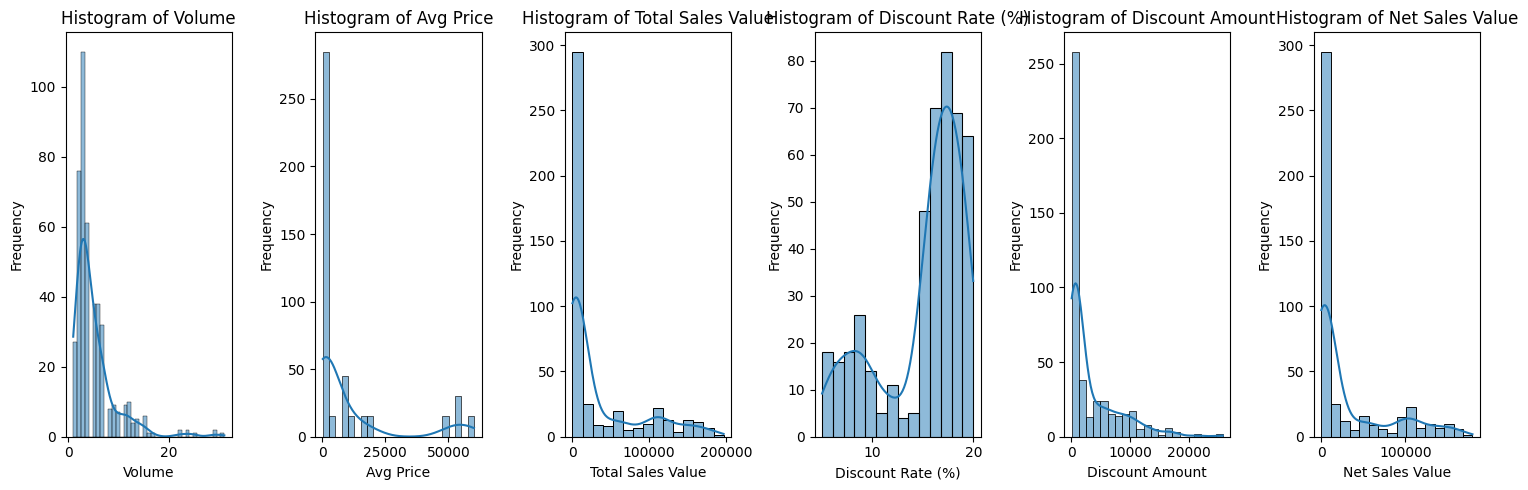

In [ ]:
# Histograms

# Plot histograms for each numerical column.
plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

2) Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.

In [ ]:
# Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.

# Calculate skewness
skewness = df[numerical_columns].apply(skew)

# Print skewness and analysis
for col in numerical_columns:
    print(f"Skewness for {col}: {skewness[col]}")

    if skewness[col] > 1:
        skew_type = 'highly positively skewed'
    elif skewness[col] > 0.5:
        skew_type = 'moderately positively skewed'
    elif skewness[col] < -1:
        skew_type = 'highly negatively skewed'
    elif skewness[col] < -0.5:
        skew_type = 'moderately negatively skewed'
    else:
        skew_type = 'approximately symmetric'

    print(f"The distribution of {col} is {skew_type}.\n")

# Interpretation of outliers
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    print(f"Outliers for {col}:")
    if outliers.empty:
        print("No significant outliers.\n")
    else:
        print(outliers, "\n")

Skewness for Volume: 2.7226094367513567
The distribution of Volume is highly positively skewed.

Skewness for Avg Price: 1.9025042657554003
The distribution of Avg Price is highly positively skewed.

Skewness for Total Sales Value: 1.529608815284332
The distribution of Total Sales Value is highly positively skewed.

Skewness for Discount Rate (%): -1.0587501046709231
The distribution of Discount Rate (%) is highly negatively skewed.

Skewness for Discount Amount: 1.9066550278687509
The distribution of Discount Amount is highly positively skewed.

Skewness for Net Sales Value: 1.535680921975744
The distribution of Net Sales Value is highly positively skewed.

Outliers for Volume:
0      15
10     13
30     11
40     29
50     13
70     24
71     14
80     12
100    25
101    15
102    11
130    15
140    14
161    12
170    12
180    12
190    22
192    11
193    11
200    12
201    12
210    14
221    11
222    11
240    15
250    31
251    12
260    16
280    24
281    11
282    12
30

● Boxplots:

1) Create boxplots for numerical variables to identify outliers and the interquartile range.

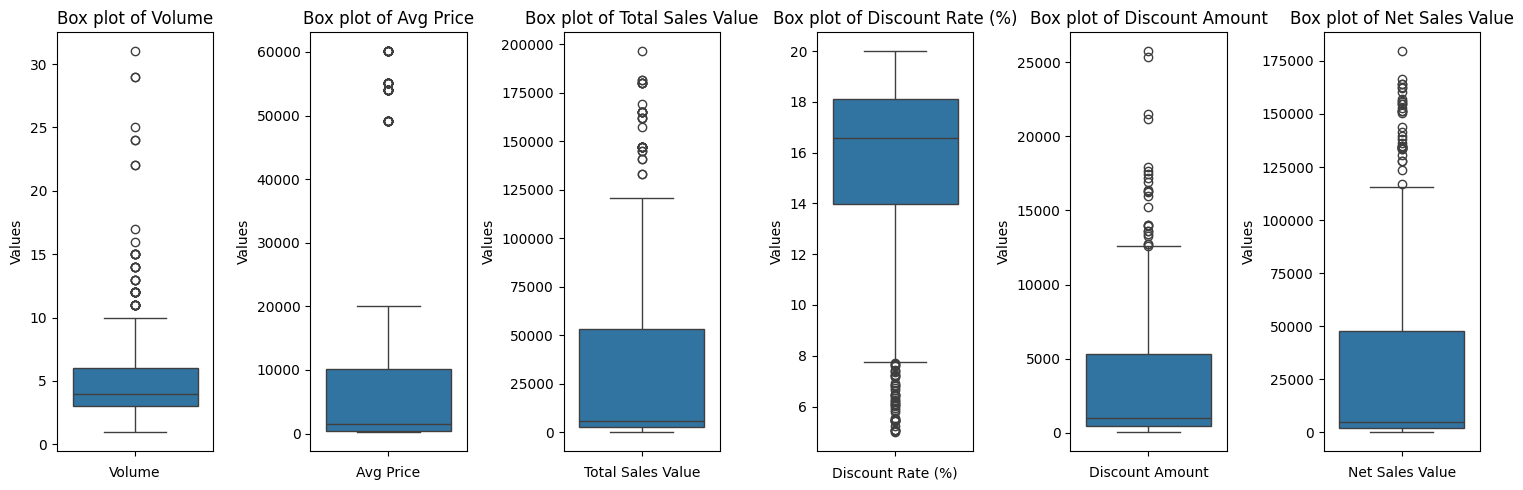

Volume:
  Q1 (25th percentile): 3.0
  Q3 (75th percentile): 6.0
  IQR (Interquartile Range): 3.0
  Lower bound: -1.5
  Upper bound: 10.5
  Outliers: [15, 13, 11, 29, 13, 24, 14, 12, 25, 15, 11, 15, 14, 12, 12, 12, 22, 11, 11, 12, 12, 14, 11, 11, 15, 31, 12, 16, 24, 11, 12, 12, 22, 11, 13, 15, 12, 14, 14, 11, 29, 15, 13, 17]

Avg Price:
  Q1 (25th percentile): 465.0
  Q3 (75th percentile): 10100.0
  IQR (Interquartile Range): 9635.0
  Lower bound: -13987.5
  Upper bound: 24552.5
  Outliers: [49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100]

Total Sales Value:
  Q1 (25th percentile): 2700.0
  Q3 (75th percentile): 53200.0
 

In [ ]:
# Boxplots

# Create boxplots for numerical variables to identify outliers and the interquartile range.

# Create box plots
plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

# Interpretation of outliers and IQR
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    print(f"{col}:")
    print(f"  Q1 (25th percentile): {Q1}")
    print(f"  Q3 (75th percentile): {Q3}")
    print(f"  IQR (Interquartile Range): {IQR}")
    print(f"  Lower bound: {lower_bound}")
    print(f"  Upper bound: {upper_bound}")

    if outliers.empty:
        print("  No significant outliers.")
    else:
        print(f"  Outliers: {outliers.tolist()}")
    print()


2) Discuss any findings, such as extreme values or unusual distributions.

1) Volume:

  Q1 (25th percentile): 3.0
  Q3 (75th percentile): 6.0
  IQR (Interquartile Range): 3.0
  Lower bound: -1.5
  Upper bound: 10.5
  Outliers: [15, 13, 11, 29, 13, 24, 14, 12, 25, 15, 11, 15, 14, 12, 12, 12, 22, 11, 11, 12, 12, 14, 11, 11, 15, 31, 12, 16, 24, 11, 12, 12, 22, 11, 13, 15, 12, 14, 14, 11, 29, 15, 13, 17]
  Distribution: The Volume distribution is assymmetric, with extreme values. The middle 50% of the ages fall between 3.0 and 6.0.

2) Avg Price:

  Q1 (25th percentile): 465.0
  Q3 (75th percentile): 10100.0
  IQR (Interquartile Range): 9635.0
  Lower bound: -13987.5
  Upper bound: 24552.5
  Outliers: [49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100]
  Distribution: The Volume distribution is assymmetric, with extreme values. The middle 50% of the ages fall between 465.0 and 10100.0.

3) Total Sales Value:

  Q1 (25th percentile): 2700.0
  Q3 (75th percentile): 53200.0
  IQR (Interquartile Range): 50500.0
  Lower bound: -73050.0
  Upper bound: 128950.0
  Outliers: [181500, 147300, 180300, 133100, 147300, 165300, 180300, 196400, 147300, 147300, 162300, 162300, 145200, 147300, 162300, 165300, 180300, 169400, 147300, 181500, 140700, 147300, 165300, 145200, 147300, 165300, 180300, 165300, 180300, 140700, 147300, 133100, 147300, 157300, 147300, 165300]
  Distribution: The Volume distribution is assymmetric, with extreme values. The middle 50% of the ages fall between 2700.0 and 53200.0.

4) Discount Rate (%):
  
  Q1 (25th percentile): 13.965062543701741
  Q3 (75th percentile): 18.114718477752703
  IQR (Interquartile Range): 4.149655934050962
  Lower bound: 7.740578642625298
  Upper bound: 24.339202378829146
  Outliers: [6.935385325, 5.553719335858815, 7.410104486, 6.214888201701022, 5.252112549273296, 7.621790957934959, 5.007822189204133, 5.870670938165718, 6.710453536396899, 6.095201440402829, 5.935084193732397, 7.584590638090228, 7.732667088605965, 7.233846742335281, 5.420506661087877, 6.849975641919071, 7.256695570137941, 7.178725899241335, 7.679385595700298, 5.794802079132935, 5.059801277154096, 6.8582545692088726, 7.208362951650773, 7.341874344, 6.473304705016388, 6.439919959844064, 7.421325599756022, 6.268913808500697, 6.819110662867928, 6.170397894995827, 5.072124185625713, 6.106930704565366, 6.508719077620175, 6.066191918625036, 5.084108426, 6.326891692775114, 6.415230294327099, 5.055218412429214, 5.4118021861669225, 5.511042321019265, 5.485156670073213, 5.466379335661308, 6.008199566158192, 6.642595335085532, 5.425910532590122]
  Distribution: The Volume distribution is assymmetric, with extreme values. The middle 50% of the ages fall between 13.965062543701741 and 18.114718477752703

5) Discount Amount:

  Q1 (25th percentile): 460.4593038855329
  Q3 (75th percentile): 5316.4954266866525
  IQR (Interquartile Range): 4856.03612280112
  Lower bound: -6823.594880316146
  Upper bound: 12600.54961088833
  Outliers: [21153.49881959317, 13594.039718999667, 17900.983733131387, 17445.603828100593, 13951.660194455462, 16384.029009441005, 16892.520950977458, 15214.643323596902, 12622.50365770546, 17178.331859479713, 12753.565957988514, 13999.93849871122, 17696.813620554134, 25328.224204195907, 13608.238319227805, 25738.02219375868, 21496.67536736378, 16332.91992953586, 14036.838652156111, 12734.009012409486, 13275.780741136909, 16218.594720354302, 13382.22733345896, 15984.732280583024]
  Distribution: The Volume distribution is assymmetric, with extreme values. The middle 50% of the ages fall between 460.4593038855329 and 5316.4954266866525

5) Net Sales Value:

  Q1 (25th percentile): 2202.2086453212287
  Q3 (75th percentile): 47847.91285159138
  IQR (Interquartile Range): 45645.70420627015
  Lower bound: -66266.347664084
  Upper bound: 116316.46916099661
  Outliers: [160346.50118040683, 133705.96028100033, 162399.01626686862, 139563.63821492044, 151348.33980554453, 163915.971, 179507.47904902254, 134677.49634229453, 134731.95462498485, 152667.35835357232, 151182.48953316535, 128021.66814052028, 134546.43404201147, 150648.92786553132, 151300.0615012888, 162603.18637944586, 144071.7757958041, 133691.7616807722, 155761.9778062413, 130557.83332702736, 136485.41909127205, 154937.48547454836, 123703.3246326362, 134934.94669153576, 154541.08736469384, 163967.08007046414, 156895.96877157467, 166263.16134784388, 127965.99098759051, 134024.2192588631, 116881.4052796457, 133917.77266654104, 141315.26771941697, 138449.92203904898, 156330.96988962853]
  Distribution: The Volume distribution is assymmetric, with extreme values. The middle 50% of the ages fall between 2202.2086453212287 and 47847.91285159138


● Bar Chart Analysis for Categorical Column

1) Identify categorical columns in the dataset.

In [ ]:
# Bar Chart Analysis for Categorical Column

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Print categorical columns
print("Categorical columns:", categorical_columns.tolist())

Categorical columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


2) Create bar charts to visualize the frequency or count of each category.

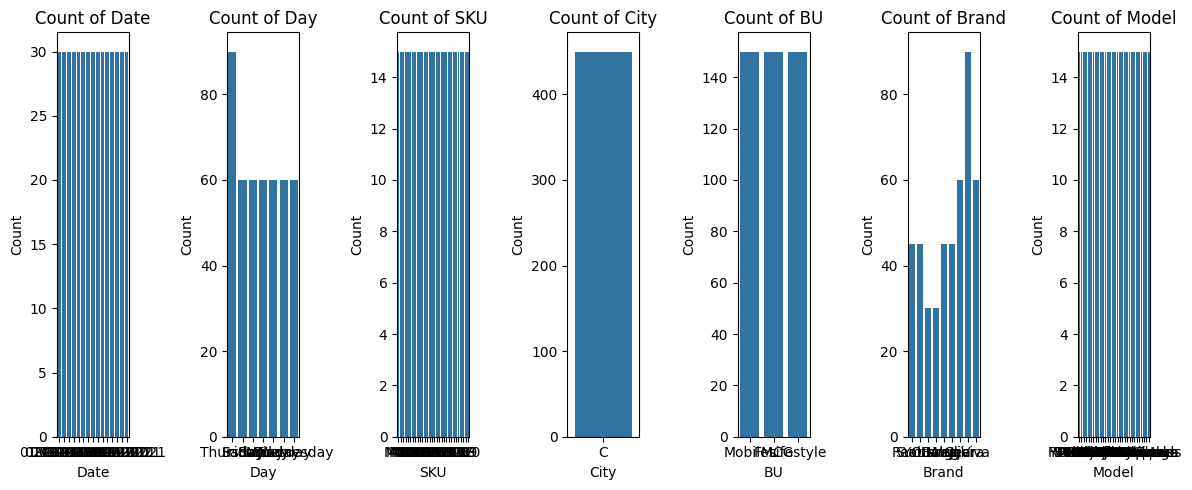

In [ ]:
# Create bar charts to visualize the frequency or count of each category
plt.figure(figsize=(12, 5))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, len(categorical_columns), i)
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

3) Analyze the distribution of categories and provide insights.

In [ ]:
# Analyze the distribution of categories and provide insights.
# Interpret the insights

category_counts = {}
for col in categorical_columns:
    category_counts[col] = df[col].value_counts()

for col, counts in category_counts.items():
    print(f"Category distribution for {col}:")
    print(counts)
    print()

Category distribution for Date:
Date
01-04-2021    30
02-04-2021    30
03-04-2021    30
04-04-2021    30
05-04-2021    30
06-04-2021    30
07-04-2021    30
08-04-2021    30
09-04-2021    30
10-04-2021    30
11-04-2021    30
12-04-2021    30
13-04-2021    30
14-04-2021    30
15-04-2021    30
Name: count, dtype: int64

Category distribution for Day:
Day
Thursday     90
Friday       60
Saturday     60
Sunday       60
Monday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64

Category distribution for SKU:
SKU
M01    15
M02    15
L09    15
L08    15
L07    15
L06    15
L05    15
L04    15
L03    15
L02    15
L01    15
F10    15
F09    15
F08    15
F07    15
F06    15
F05    15
F04    15
F03    15
F02    15
F01    15
M10    15
M09    15
M08    15
M07    15
M06    15
M05    15
M04    15
M03    15
L10    15
Name: count, dtype: int64

Category distribution for City:
City
C    450
Name: count, dtype: int64

Category distribution for BU:
BU
Mobiles      150
FMCG         150
Lifes

**Task 3: Standardization of Numerical Variables**

1) Explain the concept of standardization (z-score normalization). Standardize the numerical columns using the formula: z=x-mu/sigma

2) ​Show before and after comparisons of the data distributions.

Standardization, also known as z-score normalization, is a technique used in statistics and data analysis to transform numerical data into a standard scale. This process involves transforming the data such that it has a mean of 0 and a standard deviation of 1. This transformation is particularly useful in various statistical methods, machine learning algorithms, and data preprocessing tasks for several reasons:

Purpose of Standardization (Z-score Normalization)
Comparability: Standardization allows different datasets or variables to be compared directly without the units affecting the comparison. It brings all variables onto the same scale.

Normalization: By transforming data to have a mean of 0 and a standard deviation of 1, standardization makes the distribution of data more consistent and easier to interpret.

Algorithm Performance: Many machine learning algorithms assume or perform better when features are on a relatively similar scale and distribution. Standardization helps achieve this.

Mathematical Formula
The formula to calculate the z-score for a data point
𝑥
x is:

𝑧
=
𝑥
−
𝜇
𝜎
z=
σ
x−μ
​


Where:

𝑧
z is the standardized value (z-score).
𝑥
x is the original data point.
𝜇
μ is the mean of the dataset.
𝜎
σ is the standard deviation of the dataset.
Steps for Standardization
Calculate Mean and Standard Deviation: Compute the mean (
𝜇
μ) and standard deviation (
𝜎
σ) of the dataset.

Apply the Formula: For each data point
𝑥
x, subtract the mean (
𝜇
μ) and divide by the standard deviation (
𝜎
σ).

Result: After standardization, the transformed data will have a mean of 0 and a standard deviation of 1.

Benefits of Standardization
Improved Interpretability: Standardization makes it easier to interpret the data in terms of its relative position and spread compared to the mean.

Enhanced Algorithm Performance: Many algorithms, such as Principal Component Analysis (PCA) and K-means clustering, assume normally distributed data or perform better with standardized data.

Avoidance of Biased Results: Standardization helps to avoid features with larger scales dominating those with smaller scales in certain algorithms.

In summary, standardization (z-score normalization) is a fundamental technique to transform data into a standard scale, facilitating better analysis, comparison, and algorithm performance across various fields including statistics, machine learning, and data science.

In [ ]:

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on numerical columns and transform
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Print standardized DataFrame
print(df)

           Date       Day  SKU City    Volume         BU  Brand       Model  \
0    01-04-2021  Thursday  M01    C  2.350029    Mobiles  RealU       RU-10   
1    01-04-2021  Thursday  M02    C  1.167129    Mobiles  RealU   RU-9 Plus   
2    01-04-2021  Thursday  M03    C  0.457388    Mobiles   YouM       YM-99   
3    01-04-2021  Thursday  M04    C  0.220808    Mobiles   YouM  YM-99 Plus   
4    01-04-2021  Thursday  M05    C -0.488932    Mobiles   YouM      YM-98    
..          ...       ...  ...  ...       ...        ...    ...         ...   
445  15-04-2021  Thursday  L06    C -0.725512  Lifestyle  Jeera   M-Casuals   
446  15-04-2021  Thursday  L07    C  0.220808  Lifestyle   Viva   W-Western   
447  15-04-2021  Thursday  L08    C -0.725512  Lifestyle   Viva    W-Lounge   
448  15-04-2021  Thursday  L09    C -0.488932  Lifestyle  Jeera   M-Formals   
449  15-04-2021  Thursday  L10    C -0.962092  Lifestyle  Jeera     M-Shoes   

     Avg Price  Total Sales Value  Discount Rate (%

In [ ]:
# Standardize the numerical columns using the formula: z=x-mu/sigma

# Standardize numerical columns using the formula
for col in numerical_columns:
    mu = df[col].mean()  # Calculate mean
    sigma = df[col].std()  # Calculate standard deviation
    df[col] = (df[col] - mu) / sigma  # Standardization using the formula

# Print standardized DataFrame
print(df)

           Date       Day  SKU City    Volume         BU  Brand       Model  \
0    01-04-2021  Thursday  M01    C  2.347417    Mobiles  RealU       RU-10   
1    01-04-2021  Thursday  M02    C  1.165831    Mobiles  RealU   RU-9 Plus   
2    01-04-2021  Thursday  M03    C  0.456880    Mobiles   YouM       YM-99   
3    01-04-2021  Thursday  M04    C  0.220563    Mobiles   YouM  YM-99 Plus   
4    01-04-2021  Thursday  M05    C -0.488389    Mobiles   YouM      YM-98    
..          ...       ...  ...  ...       ...        ...    ...         ...   
445  15-04-2021  Thursday  L06    C -0.724706  Lifestyle  Jeera   M-Casuals   
446  15-04-2021  Thursday  L07    C  0.220563  Lifestyle   Viva   W-Western   
447  15-04-2021  Thursday  L08    C -0.724706  Lifestyle   Viva    W-Lounge   
448  15-04-2021  Thursday  L09    C -0.488389  Lifestyle  Jeera   M-Formals   
449  15-04-2021  Thursday  L10    C -0.961023  Lifestyle  Jeera     M-Shoes   

     Avg Price  Total Sales Value  Discount Rate (%

Task 4: Conversion of Categorical Data into Dummy Variables

1) Discuss the need for converting categorical data into dummy variables (one-hot encoding).

Converting categorical data into dummy variables, also known as one-hot encoding, is a crucial step in data preprocessing, particularly for machine learning tasks. Let's discuss the need for this transformation:

1. Handling Categorical Variables
In many real-world datasets, variables often include categorical data where values represent categories or groups. Machine learning algorithms typically require numerical inputs, and directly using categorical data can lead to issues because:

Algorithm Compatibility: Most machine learning algorithms are designed to process numerical data. Directly using categorical data can cause algorithms to misinterpret the ordinality or create unintended relationships between categories.

Representation: Categorical variables often do not have a natural numerical representation that captures the relationship between categories accurately. For example, using integer encoding (assigning integers to categories) may imply an ordered relationship that doesn't exist.

2. One-Hot Encoding: Transforming Categorical to Numerical
One-hot encoding converts categorical variables into a format that is suitable for machine learning algorithms:

Binary Representation: Each category is converted into a binary (0 or 1) representation. For each category in a variable, a new binary column is created. This ensures that no ordinal relationship is assumed between categories.

Example: If a categorical variable Color has categories Red, Green, and Blue, one-hot encoding would create three binary columns (Color_Red, Color_Green, Color_Blue), where each column indicates the presence or absence of that category.

3. Benefits of One-Hot Encoding
Preservation of Information: One-hot encoding preserves the information about the categorical variable without imposing false assumptions about the relationship between categories.

Algorithm Performance: Many machine learning algorithms perform better when categorical variables are one-hot encoded. This is because the encoded format allows algorithms to properly interpret and process categorical data.

Interpretability: After encoding, the resulting dataset is more interpretable because each category is explicitly represented as a binary feature.

4. When to Use One-Hot Encoding
Nominal Data: When the categorical data doesn't have an inherent order or hierarchy (e.g., colors, types of products), one-hot encoding is appropriate.

Machine Learning Models: One-hot encoding is widely used in models such as logistic regression, decision trees, support vector machines, and neural networks.

2) Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.

In [ ]:
# Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.

df_encoded = pd.get_dummies(df, columns=['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'])

# Display the encoded DataFrame
print("\nEncoded DataFrame with One-Hot Encoding:")
print(df_encoded)


Encoded DataFrame with One-Hot Encoding:
       Volume  Avg Price  Total Sales Value  Discount Rate (%)  \
0    2.347417   0.091072           2.922469          -0.829365   
1    1.165831  -0.019548           1.329516          -0.851714   
2    0.456880   0.312312           1.561038          -1.350129   
3    0.220563   0.533552           1.717365          -1.947555   
4   -0.488389  -0.130168          -0.188242           0.672990   
..        ...        ...                ...                ...   
445 -0.724706  -0.506277          -0.617647           0.075924   
446  0.220563  -0.434374          -0.360400           0.450596   
447 -0.724706  -0.489684          -0.605774           0.902788   
448 -0.488389  -0.473091          -0.556303           0.388042   
449 -0.961023  -0.406719          -0.607753           0.042188   

     Discount Amount  Net Sales Value  Date_01-04-2021  Date_02-04-2021  \
0           3.948422         2.801638             True            False   
1           1.8

3) Display a portion of the transformed dataset.

In [ ]:
# Display a portion of the transformed dataset.

print("Transformed DataFrame with One-Hot Encoding:")
print(df_encoded.head())

Transformed DataFrame with One-Hot Encoding:
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552           1.717365          -1.947555         1.112568   
4 -0.488389  -0.130168          -0.188242           0.672990         0.227598   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0         2.801638             True            False            False   
1         1.269613             True            False            False   
2         1.543957             True            False            False   
3         1.763847             True            False            False   
4        -0.227342             True            False            False   

   Date_04-04-2021  ...  Mode

**Task 5: Conclusion**

● Summarize the key findings from the descriptive analytics and data visualizations.

Descriptive analytics and data visualizations in Python provide crucial insights into dataset characteristics, enabling informed decisions in data preprocessing, feature engineering, and modeling. By leveraging statistical summaries and visual representations, analysts and data scientists can effectively understand data distributions, identify patterns, and derive actionable insights for further analysis or business decisions.








             Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  4.500000e+02  4.500000e+02       4.500000e+02       4.500000e+02   
mean  -1.973730e-17  3.552714e-17       1.578984e-17      -1.973730e-17   
std    1.000000e+00  1.000000e+00       1.000000e+00       1.000000e+00   
min   -9.610229e-01 -5.621398e-01      -6.611811e-01      -2.404259e+00   
25%   -4.883887e-01 -5.524605e-01      -6.156681e-01      -2.819928e-01   
50%   -2.520716e-01 -4.979801e-01      -5.563034e-01       3.370428e-01   
75%    2.205626e-01 -1.954841e-02       3.836378e-01       7.011977e-01   
max    6.128490e+00  2.745953e+00       3.217313e+00       1.146084e+00   

       Discount Amount  Net Sales Value  
count     4.500000e+02     4.500000e+02  
mean     -4.342206e-17     7.894919e-18  
std       1.000000e+00     1.000000e+00  
min      -7.266945e-01    -6.501345e-01  
25%      -6.399340e-01    -6.096839e-01  
50%      -5.227531e-01    -5.562833e-01  
75%       4.368156e-01     3.7

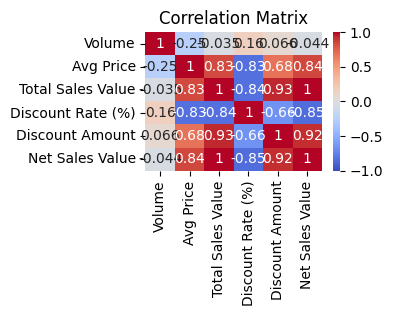

In [ ]:
# Summarize the key findings from the descriptive analytics and data visualizations.

# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Correlation matrix
plt.subplot(2, 2, 3)
corr_matrix = df.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

● Reflect on the importance of data preprocessing steps like standardization and one-hot encoding in data analysis and machine learning.

Data preprocessing is a critical step in data analysis and machine learning, as it transforms raw data into a format that can be efficiently and effectively utilized by algorithms. Here’s a reflection on the importance of specific preprocessing steps like standardization and one-hot encoding:

1. Standardization
Definition: Standardization transforms data to have a mean of 0 and a standard deviation of 1. This process ensures that each feature contributes equally to the model's performance.

Importance:

Algorithm Performance: Many machine learning algorithms, such as k-nearest neighbors (KNN), support vector machines (SVM), and principal component analysis (PCA), are sensitive to the scale of the input data. Standardization ensures that these algorithms perform optimally by treating all features equally.
Convergence Speed: For gradient-based algorithms like linear regression and neural networks, standardized data can lead to faster convergence during training. This is because the algorithms can traverse the cost landscape more efficiently when features are on a similar scale.
Comparability: Standardization allows for meaningful comparison between different features, which is crucial when interpreting model coefficients or feature importances.
2. One-Hot Encoding
Definition: One-hot encoding transforms categorical variables into a binary (0 or 1) format, where each unique category is represented by a separate column.

Importance:

Algorithm Compatibility: Most machine learning algorithms require numerical input. One-hot encoding converts categorical data into a numerical format, making it suitable for these algorithms.
Avoiding Ordinality Assumptions: Unlike label encoding, which assigns a unique integer to each category, one-hot encoding prevents algorithms from assuming an ordinal relationship between categories. This is important for categorical variables without a natural order (e.g., colors, cities).
Improving Model Performance: One-hot encoding can enhance model performance by providing a clear and unambiguous representation of categorical data, which helps the algorithm understand and learn from these features effectively.
3. Overall Importance of Data Preprocessing
Data Quality: Preprocessing steps such as handling missing values, scaling, and encoding improve the quality of the data, making it more reliable and accurate for analysis.
Model Accuracy: Properly preprocessed data leads to better model performance. This is because the algorithm can more accurately capture the underlying patterns in the data without being misled by noise or inconsistencies.
Interpretability: Preprocessing can enhance the interpretability of the results. For example, standardizing data can make it easier to compare feature importances, and one-hot encoding makes it clear how each category contributes to the predictions.
Efficiency: Efficient preprocessing can reduce computational costs and time. For instance, standardization can speed up the training process, and encoding can reduce the complexity of the dataset.

Conclusion:
Data preprocessing steps like standardization and one-hot encoding are foundational to the success of data analysis and machine learning projects. They ensure that the data is in the best possible state for algorithmic processing, leading to more accurate, interpretable, and efficient models. Skipping these steps can result in poor model performance, misleading insights, and longer training times, ultimately undermining the overall effectiveness of the data analysis process.